<a href="https://colab.research.google.com/github/just3shot/Learning/blob/main/Quickdraw_Challenge_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -qq https://www.dropbox.com/s/gdlb8dnjzcly51o/quickdraw.zip
  
!unzip -qq quickdraw.zip

!rm -r __MACOSX
!rm quickdraw.zip

!ls

quickdraw  sample_data


In [ ]:
!ls quickdraw



'alarm clock.npy'   bee.npy		 cookie.npy	  lollipop.npy
 ambulance.npy	   'birthday cake.npy'	 donut.npy	 'palm tree.npy'
 angel.npy	    brain.npy		 eyeglasses.npy   pig.npy
 ant.npy	    cactus.npy		 face.npy	  postcard.npy
 banana.npy	    cat.npy		 fish.npy	  rainbow.npy


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm # colourmap
%matplotlib inline

import numpy as np

from glob import glob # filename pattern matching module
import ntpath
# http://effbot.org/librarybook/ntpath.htm
# provides os.path functionality on Windows platform

import tensorflow as tf

In [ ]:
file_names = glob("./quickdraw/*.npy") # Grab and make a list of file names with .npy extension 

In [ ]:
print(type(file_names))
file_names

<class 'list'>


['./quickdraw/cactus.npy',
 './quickdraw/ant.npy',
 './quickdraw/pig.npy',
 './quickdraw/brain.npy',
 './quickdraw/birthday cake.npy',
 './quickdraw/face.npy',
 './quickdraw/bee.npy',
 './quickdraw/cookie.npy',
 './quickdraw/fish.npy',
 './quickdraw/ambulance.npy',
 './quickdraw/lollipop.npy',
 './quickdraw/banana.npy',
 './quickdraw/alarm clock.npy',
 './quickdraw/donut.npy',
 './quickdraw/postcard.npy',
 './quickdraw/eyeglasses.npy',
 './quickdraw/angel.npy',
 './quickdraw/cat.npy',
 './quickdraw/palm tree.npy',
 './quickdraw/rainbow.npy']

In [ ]:
# Make some class names for classification
class_names = []

for file in file_names:
  name = ntpath.basename(file)
  name = name[:-4] # Remove the .npy extension in name
  class_names.append(name)
print(class_names)

['cactus', 'ant', 'pig', 'brain', 'birthday cake', 'face', 'bee', 'cookie', 'fish', 'ambulance', 'lollipop', 'banana', 'alarm clock', 'donut', 'postcard', 'eyeglasses', 'angel', 'cat', 'palm tree', 'rainbow']


In [ ]:
# Test to see what i am doing
for i, j in enumerate(file_names): # j refers to the filename
  print(i,j)

0 ./quickdraw/cactus.npy
1 ./quickdraw/ant.npy
2 ./quickdraw/pig.npy
3 ./quickdraw/brain.npy
4 ./quickdraw/birthday cake.npy
5 ./quickdraw/face.npy
6 ./quickdraw/bee.npy
7 ./quickdraw/cookie.npy
8 ./quickdraw/fish.npy
9 ./quickdraw/ambulance.npy
10 ./quickdraw/lollipop.npy
11 ./quickdraw/banana.npy
12 ./quickdraw/alarm clock.npy
13 ./quickdraw/donut.npy
14 ./quickdraw/postcard.npy
15 ./quickdraw/eyeglasses.npy
16 ./quickdraw/angel.npy
17 ./quickdraw/cat.npy
18 ./quickdraw/palm tree.npy
19 ./quickdraw/rainbow.npy


In [ ]:
# x_data is the dataset used
# y_labels is the labeling of data 
x_data = []
y_labels = []

for i, j in enumerate(file_names):
  array_data = np.load(j) # j itself is just a file path
  array_data = array_data[:10000, :] # Crop the first 10k data entries
  x_data.append(array_data)
  
  for k in range(10000):
    k = i
    y_labels.append(k) # Should have 10k 0, 10k 1, 10k 2 ....., 10k 20
  
x_data = np.asarray(x_data) # (20, 10000, 784)
x_data = np.reshape(x_data, (20*10000, 784))
print(x_data.shape)

y_labels = np.asarray(y_labels)
y_labels.shape
  

(200000, 784)


(200000,)

In [ ]:
# Shuffle
from sklearn.utils import shuffle
x_data, y_labels = shuffle(x_data, y_labels, random_state=42)

# Train Test Split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_labels, test_size=0.1, random_state=42) # 10% of the data is used to test

x_train.shape, y_train.shape

((180000, 784), (180000,))

In [ ]:
y_labels[:10]

array([11,  7, 15,  6,  3,  2, 13, 17, 13,  0])

In [ ]:
# Preprocessing the Data
image_size = 28

# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0 # To make the values between 0 and 1
x_test /= 255.0

print(x_train.shape)
x_train.ndim

(180000, 28, 28, 1)


4

In [ ]:
y_train[:10]
# We want to change 16 to [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0]

array([16, 19,  0,  9, 14, 15, 10,  2,  1,  6])

In [ ]:
# Convert class vectors to class matrices
y_train = tf.keras.utils.to_categorical(y_train, len(class_names)) # 1 hot encoding
y_test = tf.keras.utils.to_categorical(y_test, len(class_names))

In [ ]:
y_train[:3]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)

In [ ]:
# Data Pipeline

import keras
from keras.models import Model, Sequential
from keras.applications.mobilenet import MobileNet
from keras.layers import *
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [ ]:
# Setting up our Network Hyper Parameters

learning_rate = 0.001 
training_epochs = 10
batch_size = 128
num_classes = 20 

In [ ]:
input_shape = (28,28,1)
num_classes = 20

# Model
Inp=Input(shape=input_shape)
x = Conv2D(32, kernel_size=(3, 3), activation='relu',name = 'Conv_01')(Inp)
x = MaxPooling2D(pool_size=(2, 2),name = 'MaxPool_01')(x)
x = Conv2D(64, (3, 3), activation='relu',name = 'Conv_02')(x)
x = MaxPooling2D(pool_size=(2, 2),name = 'MaxPool_02')(x)
x = Conv2D(64, (3, 3), activation='relu',name = 'Conv_03')(x)
x = Flatten(name = 'Flatten_01')(x)
x = Dense(64, activation='relu',name = 'Dense_01')(x)
x = Dropout(0.5,name = 'Dropout_02')(x)
output = Dense(num_classes, activation='softmax',name = 'Dense_02')(x)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
model = Model(Inp,output)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
Conv_01 (Conv2D)             (None, 26, 26, 32)        320       
_________________________________________________________________
MaxPool_01 (MaxPooling2D)    (None, 13, 13, 32)        0         
_________________________________________________________________
Conv_02 (Conv2D)             (None, 11, 11, 64)        18496     
_________________________________________________________________
MaxPool_02 (MaxPooling2D)    (None, 5, 5, 64)          0         
_________________________________________________________________
Conv_03 (Conv2D)             (None, 3, 3, 64)          36928     
_________________________________________________________________
Flatten_01 (Flatten)         (None, 576)               0         
__________

In [ ]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer= Adam(),
              metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          callbacks = None,
          validation_data=(x_test, y_test))

Train on 180000 samples, validate on 20000 samples
Epoch 1/10
180000/180000 [==============================] - 179s 994us/step - loss: 1.1393 - acc: 0.6661 - val_loss: 0.6038 - val_acc: 0.8273
Epoch 2/10
180000/180000 [==============================] - 178s 988us/step - loss: 0.7050 - acc: 0.8020 - val_loss: 0.4990 - val_acc: 0.8587
Epoch 3/10
180000/180000 [==============================] - 178s 989us/step - loss: 0.5835 - acc: 0.8373 - val_loss: 0.4363 - val_acc: 0.8766
Epoch 4/10
180000/180000 [==============================] - 178s 991us/step - loss: 0.5154 - acc: 0.8576 - val_loss: 0.4103 - val_acc: 0.8831
Epoch 5/10
180000/180000 [==============================] - 184s 1ms/step - loss: 0.4696 - acc: 0.8700 - val_loss: 0.3818 - val_acc: 0.8920
Epoch 6/10
180000/180000 [==============================] - 179s 995us/step - loss: 0.4402 - acc: 0.8787 - val_loss: 0.3690 - val_acc: 0.8944
Epoch 7/10
180000/180000 [==============================] - 180s 998us/step - loss: 0.4135 - acc: 0

In [ ]:
def plot_train(hist):
    h = hist.history
    if 'acc' in h:
        meas='acc'
        loc='lower right'
    else:
        meas='loss'
        loc='upper right'
    plt.plot(hist.history[meas])
    plt.plot(hist.history['val_'+meas])
    plt.title('model '+meas)
    plt.ylabel(meas)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc=loc)

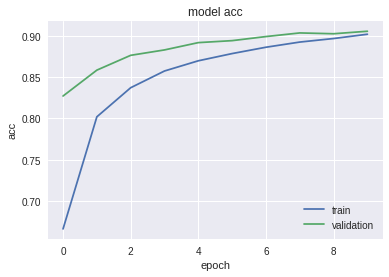

In [ ]:
plot_train(hist)

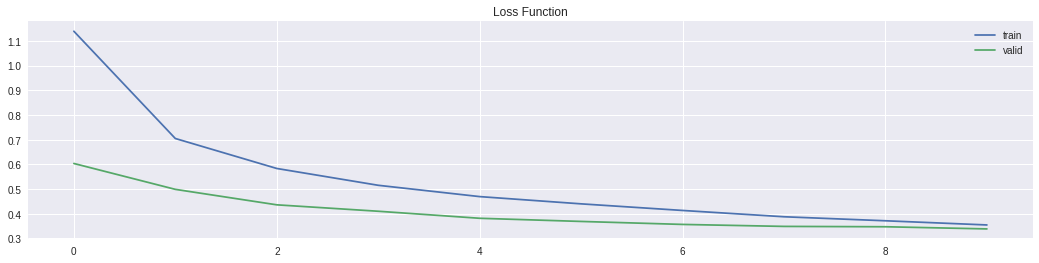

In [ ]:
# Plot loss function value through epochs
plt.figure(figsize=(18, 4))
plt.plot(hist.history['loss'], label = 'train')
plt.plot(hist.history['val_loss'], label = 'valid')
plt.legend()
plt.title('Loss Function')
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

20000/20000 [==============================] - 6s 322us/step


[0.33875188027024267, 0.9058]

90.58% Accuracy on test data